## CAP 4631C - Fall 2024. Assignment 4

### Group 5:


*   Alberto Diaz
*   Barbara Lorenzo
*   Bosco Morales
*   Robert Rivera


### Introduction

This assignment is about Regression Trees (combined with prior material too). It has three questions.
You are going to use a modified* version of the Hitters dataset. You can find this file on Canvas in the Assignment 4 section.



*This file has been cleaned to remove the rows with missing data. Also, some of the variables have been discarded.

Use the following link to read more info about the original Hitters dataset (remember, we are using a modified version of the original one): https://rdrr.io/cran/ISLR/man/Hitters.html

The outcome variable to predict is the column called “Salary” (the last column).




In [33]:
# Loading packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

from sklearn.model_selection import GridSearchCV

In [34]:
# Mounting drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
# Data path

path_hitters= "/content/drive/MyDrive/CAP4631C/Datasets_CAP4631C/Hitters_ML_HW4.csv"

In [36]:
# Read data

hitters_df= pd.read_csv (path_hitters)

## Question 1 (40 points)

Estimate a regression tree to predict the column Salary.

**Requirements** that **MUST** be followed to estimate this tree:


*   Use *all* the predictors when constructing the tree *with the exception* of “League”, “Division”, and “New League”.
*   Use the train_test_split() method and use 80% of the players to train the tree.
*   Create a parameter grid that includes all the following parameters: 'max_depth', 'min_samples_split', 'min_samples_leaf', and 'min_impurity_decrease'. *Use the exact same values we tried in class for these hyperparameters.*
*   Use the GridSearchCV() method with 5 folds in cross-validation and scoring='neg_mean_squared_error'

In [37]:
X_all = hitters_df.iloc[:,:-4]

In [38]:
y= hitters_df['Salary']

In [39]:
X_train, X_test, y_train, y_test= train_test_split (X_all, y, test_size=0.2, random_state=1)

In [40]:
hyperparam_grid = {
    'max_depth': np.arange(2,11), # testing different depths (from 2 to 10)
    'min_samples_split':[0.05, 0.1, 0.15, 0.2, 0.25], # Commonly tested values for this hyperparameter
    'min_samples_leaf':[0.05, 0.1, 0.15, 0.2, 0.25], # Commonly tested values for this hyperparameter
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01, 0.05] # Commonly tested values for this hyperparameter
}

In [41]:
cv_object = KFold (n_splits= 5, shuffle= True, random_state= 1)

In [42]:
grid_search_setting = GridSearchCV(estimator= DecisionTreeRegressor(random_state= 1), param_grid= hyperparam_grid, cv= cv_object, scoring='neg_mean_squared_error')

In [43]:
grid_search_setting.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_impurity_decrease': [0, 0.0005, 0.001, 0.005,
                                                   0.01, 0.05],
                         'min_samples_leaf': [0.05, 0.1, 0.15, 0.2, 0.25],
                         'min_samples_split': [0.05, 0.1, 0.15, 0.2, 0.25]},
             scoring='neg_mean_squared_error')

In [44]:
print('Selected hyperparameter values: ', grid_search_setting.best_params_)

Selected hyperparameter values:  {'max_depth': 4, 'min_impurity_decrease': 0, 'min_samples_leaf': 0.1, 'min_samples_split': 0.05}


In [45]:
reg_tree_multiple_hitters= DecisionTreeRegressor(max_depth= 4, min_samples_split= 0.05, min_samples_leaf= 0.1, min_impurity_decrease= 0, random_state=1)

In [46]:
reg_tree_multiple_hitters.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_impurity_decrease=0,
                      min_samples_leaf=0.1, min_samples_split=0.05,
                      random_state=1)

### 1a) Report the mean squared error of the chosen tree evaluated on the test dataset.

In [47]:
y_pred_full_tree= reg_tree_multiple_hitters.predict (X_test)

In [48]:
# MSE on test data (or test MSE)

mean_squared_error( y_test, y_pred_full_tree)

0.27349089121582915

#### 1a Response

The mean squared error is 0.27349089121582915

### 1b) Use the leftmost and the rightmost branches of your tree and write out the rules that can be derived from these two branches.

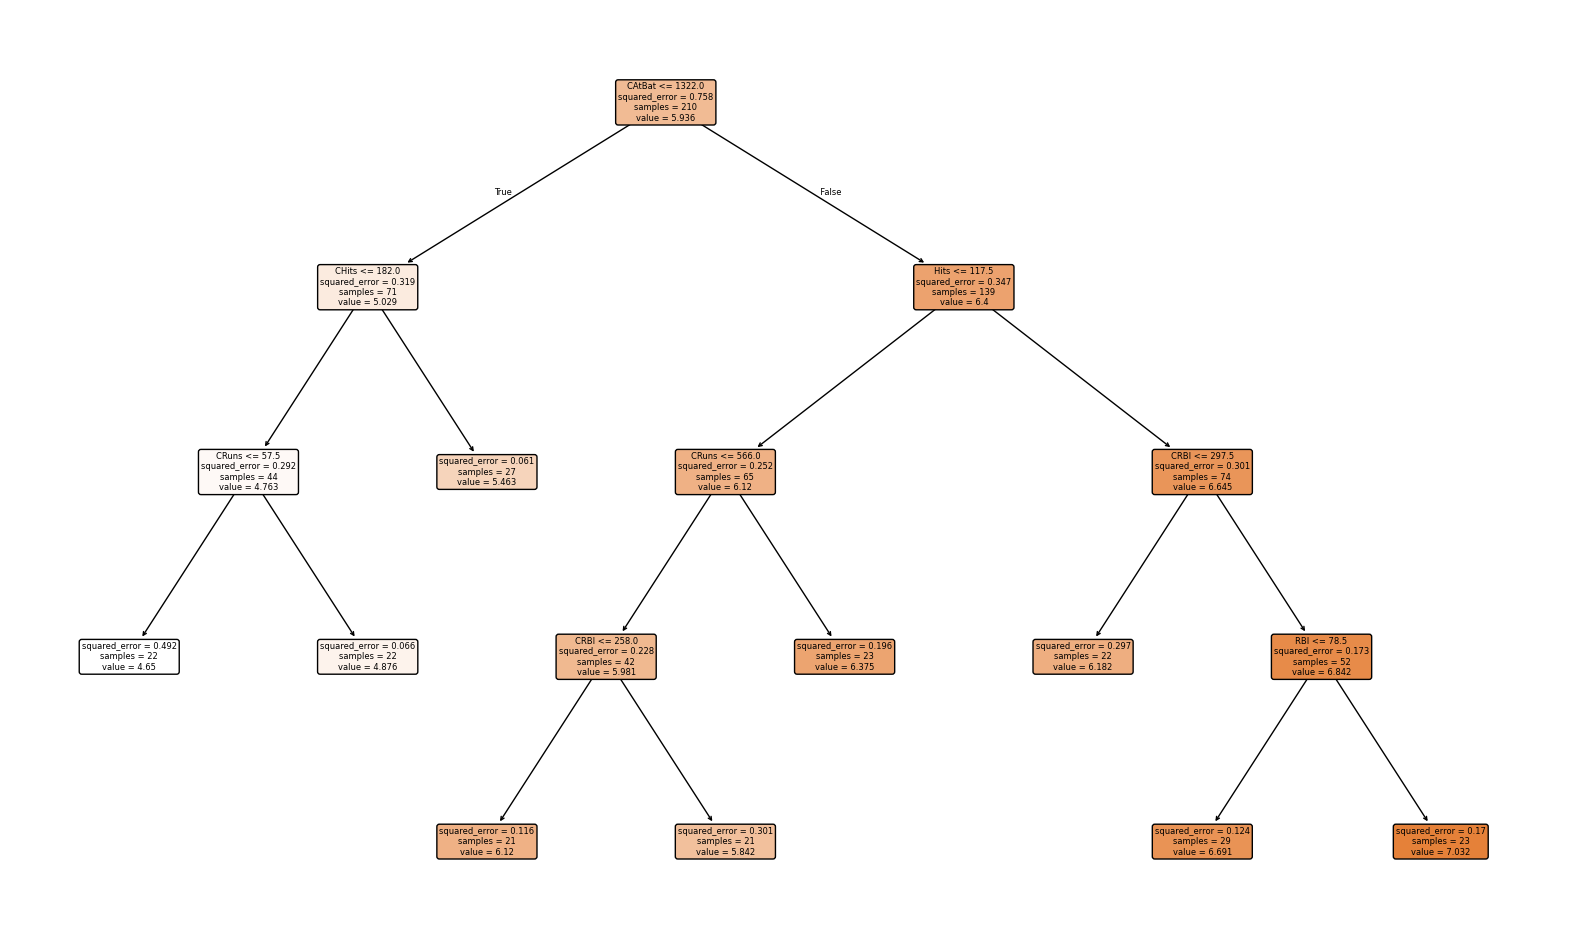

In [49]:
# Plot the tree

plt.rcParams["figure.figsize"] = (20, 12)
tree.plot_tree(reg_tree_multiple_hitters,filled=True, rounded= True, feature_names=X_train.columns, fontsize= 6)
plt.show()

#### 1b Response

Interpreting the tree by deriving rules:

*   **Rule 1 (left-most branch)**: When CAtBat <= 1322.0 AND CHits <= 182.0 AND CRuns <= 57.5 then: predicted Salary= 4.65
*  **Rule 2 (tight-most branch)**: When CAtBat > 1322.0 AND Hits > 117.5 AND CRBI > 297.5 AND RBI > 78.5 then: predicted Salary= 7.032

## Question 2 (40 points)

Use the train_test_split() method to split the Hitters data frame in 80% training and 20% testing. You can use the results from the split you did in question 1 (no need to repeat the split again).

### 2a) Use the **training data** and select the best predictor**s** to include in a *multiple linear equation* to predict the column "Salary".
###In the search for the best predictors, consider ***all***  the predictors with the exception of “League”, “Division”, and “New League”. **Report this equation** (i.e., write out the equation).

*   **Requirement**: To select the best predictor***s*** to include in a *multiple linear equation*, you MUST use cross-validation (i,e., the ML approach).
*  Make sure that you show all your work (= show what steps you took to get these predictor**s**).


In [50]:
%run "/content/drive/MyDrive/CAP4631C/Module 2/BSS_definitions.ipynb"

In [51]:
bss_cv_results_hitters= my_best_subset_selection_cv ( X_train , y_train,folds= 10)

<ipython-input-50-4e98b24c1dab>:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  out_df = pd.concat([out_df, df_iteration], ignore_index=True)


Cross-validation results for predictors: ['CRuns']
Cross-validation MSE values: [0.3827529  0.79677806 0.33887412 0.3093255  0.51787414 0.74627076
 0.47375651 0.52796049 0.50024788 0.32367885]
Mean cross-validation MSE: 0.4918

Cross-validation results for predictors: ['Hits', 'Years']
Cross-validation MSE values: [0.20110862 0.40494539 0.25802602 0.30363862 0.29107335 0.94211223
 0.55415389 0.4486346  0.33351852 0.28625993]
Mean cross-validation MSE: 0.4023

Cross-validation results for predictors: ['Hits', 'Years', 'CHmRun']
Cross-validation MSE values: [0.18973994 0.3963755  0.26827314 0.29140626 0.297169   1.01420255
 0.51264435 0.40510637 0.33776661 0.2744742 ]
Mean cross-validation MSE: 0.3987

Cross-validation results for predictors: ['Hits', 'Years', 'CHmRun', 'CRuns']
Cross-validation MSE values: [0.19398566 0.46108162 0.26854196 0.28460461 0.2911947  1.00465327
 0.50558265 0.40263316 0.33307579 0.27348645]
Mean cross-validation MSE: 0.4019

Cross-validation results for predic

In [52]:
percent_reduction_threshold= 5

In [53]:
# Compute percent reduction in Mean_CV_MSE from one model to the next one
percent_reduction = - ( bss_cv_results_hitters['Mean_CV_MSE'].pct_change().dropna() )*100
percent_reduction.name = "Pct reduc from previous model"

# Find the last set of predictors that meet the threshold
last_row_above_threshold = bss_cv_results_hitters.iloc[percent_reduction[percent_reduction >= percent_reduction_threshold].index[-1]]['Predictors']

print("BSS selects the following predictors for the model:")
print(last_row_above_threshold)
print ()
print("Adding additional predictors results in a % reduction in Mean CV MSE below", percent_reduction_threshold, "%:")

BSS selects the following predictors for the model:
['Hits', 'Years']

Adding additional predictors results in a % reduction in Mean CV MSE below 5 %:


In [54]:
reg_bss_hiitters_train= LinearRegression()

In [55]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, 219 to 37
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Hits    210 non-null    int64
 1   HmRun   210 non-null    int64
 2   Runs    210 non-null    int64
 3   RBI     210 non-null    int64
 4   Years   210 non-null    int64
 5   CAtBat  210 non-null    int64
 6   CHits   210 non-null    int64
 7   CHmRun  210 non-null    int64
 8   CRuns   210 non-null    int64
 9   CRBI    210 non-null    int64
dtypes: int64(10)
memory usage: 18.0 KB


In [56]:
reg_bss_hiitters_train.fit (X_train[['Hits', 'Years']], y_train)

LinearRegression()

In [57]:
y_pred_test_hitters_bss =reg_bss_hiitters_train.predict(X_test[['Hits', 'Years']])

In [58]:
intercept = reg_bss_hiitters_train.intercept_

coefficients = reg_bss_hiitters_train.coef_

coef_values = np.concatenate(([intercept], coefficients)) # need to convert the intercept value into a list or array bf using it in concatenate.

column_names = np.concatenate((['Intercept'], reg_bss_hiitters_train.feature_names_in_))

# Creating the DataFrame

coefficients_df = pd.DataFrame({'Coefficient Name': column_names, 'Coefficient Value': coef_values})

print(coefficients_df)

  Coefficient Name  Coefficient Value
0        Intercept           4.264768
1             Hits           0.009202
2            Years           0.093826


#### 2a Response


Predicted Salary = 4.26 + 0.009(Hits) + 0.0938(Years)

### 2b) **Report the mean squared error** of the equation obtained in part a) evaluated **on the test dataset. Compare** the Regression Tree obtained in question 1 with this linear equation. Which one is better? **JUSTIFY**.

In [59]:
# MSE on test data (or test MSE)

mean_squared_error( y_test, y_pred_test_hitters_bss)

0.5114379227478156

In [60]:
# MSE values
mse_linear_regression = 0.5114379227478156
mse_regression_tree = 0.27349089121582915

# Percentage reduction in MSE
percentage_reduction = ((mse_linear_regression - mse_regression_tree) / mse_linear_regression) * 100

print(f"Percentage Reduction in MSE: {percentage_reduction:.2f}%")

Percentage Reduction in MSE: 46.53%


#### 2b Response

Regression Tree MSE = 0.27349089121582915

Linear Regression MSE = 0.5114379227478156

The regression tree shows a smaller MSE (27.3%) compared to the Multiple Linear Equation (51.1%). This is a 46.53% improvement in MSE and makes the regression tree model more reliable than the multiple linear equation.



### 2c) Observe the predictors part of the Regression Tree obtained in question 1 and the predictors part of the linear equation obtained in 2a).

###Which predictors (if any) show up in the Regression Tree but not in the equation? How about vice versa? To answer this question, you MUST SHOW ALL your work.

In [61]:
# Get the feature indices used in the tree splits
feature_indices = reg_tree_multiple_hitters.tree_.feature

# Filter out -2, which indicates leaf nodes
used_features_indices = np.unique(feature_indices[feature_indices != -2])

# Map indices to feature names using the columns of the DataFrame
feature_names = X_all.columns[used_features_indices]
print("Regression Tree Parameter:", feature_names)
print("Multiple Linear Regression Parameter:",last_row_above_threshold)

Regression Tree Parameter: Index(['Hits', 'RBI', 'CAtBat', 'CHits', 'CRuns', 'CRBI'], dtype='object')
Multiple Linear Regression Parameter: ['Hits', 'Years']


In [62]:
# Define the sets of predictors for each model based on your image output
reg_tree_predictors = set(['Hits', 'RBI', 'CAtBat', 'CHits', 'CRuns', 'CRBI'])
linear_regression_predictors = set(['Hits', 'Years'])

# Find predictors in the Regression Tree but not in the Linear Regression
unique_to_tree = reg_tree_predictors - linear_regression_predictors
print("Unique to Regression Tree:", unique_to_tree)

# Find predictors in the Linear Regression but not in the Regression Tree
unique_to_regression = linear_regression_predictors - reg_tree_predictors
print("Unique to Linear Regression:", unique_to_regression)

# Optionally, find common predictors
common_predictors = reg_tree_predictors & linear_regression_predictors
print("Common predictors:", common_predictors)


Unique to Regression Tree: {'CRuns', 'RBI', 'CHits', 'CAtBat', 'CRBI'}
Unique to Linear Regression: {'Years'}
Common predictors: {'Hits'}


#### 2c Response

The predictors **'RBI', 'CRBI', 'CAtBat', 'CHits', 'CRuns'** appear in the *Regression Tree model* but are absent from the *Linear Regression model*.

The predictor **Years** appears in the *Linear Regression model* but is absent from the *Regression Tree model*.

## Question 3 (20 points)

### Apply the post-pruning methodology learned in class (i.e., the cost complexity pruning) to estimate a new regression tree with the Hitters dataset. **Compare** this tree with the one obtained in question 1. Which tree is better? **JUSTIFY**.

**Note**: You *MUST use the exact methodology* (steps) we learned in class.

In [63]:
# Here we are getting the initial huge tree

reg_tree_unprunned = DecisionTreeRegressor(random_state=1)

In [64]:
reg_tree_unprunned.fit(X_train , y_train)

DecisionTreeRegressor(random_state=1)

In [65]:
ccp_path= reg_tree_unprunned.cost_complexity_pruning_path(X_train , y_train)

In [66]:
hyperparam_grid_alpha = {'ccp_alpha': ccp_path['ccp_alphas']}

In [67]:
grid_search_setting_alpha= GridSearchCV(estimator= DecisionTreeRegressor(random_state=1), param_grid= hyperparam_grid_alpha,  cv= cv_object , scoring='neg_mean_squared_error')

In [68]:
grid_search_setting_alpha.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'ccp_alpha': array([0.00000000e+00, 3.38353684e-17, 6.76707367e-17, 1.01506105e-16,
       2.03012210e-16, 4.40635857e-08, 1.20627218e-07, 1.39808616e-07,
       1.51170780e-07, 2.22309849e-07, 3.60747324e-07, 3.67426198e-07,
       4.28993988e-07, 5.48528699e-07...
       2.45712089e-03, 2.64359526e-03, 2.84421883e-03, 2.88104066e-03,
       2.97644624e-03, 3.41670948e-03, 3.58480832e-03, 3.82343607e-03,
       4.53602615e-03, 6.76803818e-03, 8.39019216e-03, 8.75751875e-03,
       8.79965928e-03, 9.21466017e-03, 9.25556772e-03, 1.31376652e-02,
       1.49268657e-02, 3.40620240e-02, 3.99999331e-02, 4.54462178e-02,
       4.20406373e-01])},
             scoring='neg_mean_squared_error')

In [69]:
grid_search_setting_alpha.best_params_

{'ccp_alpha': 0.013137665177668047}

In [70]:
reg_tree_multiple_hitters_postp= DecisionTreeRegressor( random_state=1, ccp_alpha= 0.013137665177668047)

In [71]:
reg_tree_multiple_hitters_postp.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.013137665177668047, random_state=1)

In [72]:
y_pred_full_tree_postp= reg_tree_multiple_hitters_postp.predict (X_test)

In [73]:
# MSE on test data

mean_squared_error (y_test, y_pred_full_tree_postp)

0.19636444888971308

In [74]:
regression_tree_v1 = 0.27349089121582915

regression_tree_with_post_pruning_v2 = 0.19636444888971308

((regression_tree_v1 - regression_tree_with_post_pruning_v2)/regression_tree_v1) * 100

28.200735309042035

#### Q3 Response

The Regression Tree with Post-Pruning (version 2) is the superior model for predicting outcomes both accurately and generally. This is because it achieves an 8.74% reduction in MSE, surpassing our established improvement threshold of 5%. This significant decrease in error demonstrates the model's enhanced ability to generalize, making it the preferable choice.